In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

## Data Cleaning

### 1. Handle misssing values:

In [ ]:
# Handle missing values
missing_values = df.isnull().sum()
print(f"\nMissing values in each column: {missing_values}")

In [ ]:
# Drop rows with missing values in the 'text' column
df_cleaned = df.dropna(subset=['text'])

# Verify that the rows with missing 'text' values have been dropped
print("\nNumber of rows after dropping missing 'text' values:", df_cleaned.shape[0])

# Check the missing values again
missing_values_after_cleaning = df_cleaned.isnull().sum()
print(f"\nMissing values in each column after cleaning: {missing_values_after_cleaning}")


### 2. Remove duplications

In [ ]:
# Remove duplicates
df_cleaned.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

In [ ]:
# Load the datasets
test_df = pd.read_csv('/content/sample_data/TestSet_FeatureEngeneering.csv')  # Should be changed to the path of the TestSet_FeatureEngeneering.csv
train_df = pd.read_csv('/content/sample_data/TrainSet_FeatureEngeneering.csv')  # Should be changed to the path of the TrainSet_FeatureEngeneering.csv
submit_df = pd.read_csv('/content/sample_data/submit.csv')  # Should be changed to the path of the submit.csv

In [ ]:
submit_df.shape

(5200, 2)

In [ ]:
test_df.shape

(5193, 16)

In [ ]:
combined_test_df = pd.merge(submit_df, test_df, on='id', how='inner')
combined_test_df.shape

(5193, 17)

In [ ]:
combined_df = pd.concat([train_df, combined_test_df], ignore_index=True)

# This dropna is for the statistics and not for the model!
combined_df = combined_df.dropna()

# Display the shape of the combined dataframe to ensure the merge was successful
combined_df.shape

(23312, 17)

In [15]:
# Checking balaces of data between the two labels
label_1_count = combined_df[combined_df['label'] == 1].shape[0]
print(f"Number of rows with label = 1: {label_1_count}")
label_1_count = combined_df[combined_df['label'] == 0].shape[0]
print(f"Number of rows with label = 1: {label_1_count}")


Number of rows with label = 1: 10738
Number of rows with label = 1: 12574


In [ ]:
# Check the missing values again
missing_values_after_cleaning = combined_df.isnull().sum()
print("\nMissing values in each column after cleaning:")
print(missing_values_after_cleaning)


Missing values in each column after cleaning:
id                         0
title                      0
author                     0
text                       0
label                      0
text_no_stopwords          0
text_word_count            0
title_word_count           0
text_unique_word_count     0
title_unique_word_count    0
text_punctuation_count     0
title_punctuation_count    0
text_sentiment             0
named_entity_count         0
exclamation_count          0
question_count             0
capital_ratio              0
dtype: int64


### Summary statistics + Visualizations:

Summary Statistics:
       text_word_count  title_word_count  text_unique_word_count  \
count     23312.000000      23312.000000            23312.000000   
mean        471.371311         12.473147              342.031658   
std         521.007979          4.012567              306.471565   
min           1.000000          1.000000                1.000000   
25%         178.000000         10.000000              145.000000   
50%         361.000000         13.000000              277.000000   
75%         649.000000         15.000000              476.000000   
max       20876.000000         72.000000             7315.000000   

       title_unique_word_count  text_punctuation_count  \
count             23312.000000            23312.000000   
mean                 12.240177              108.779341   
std                   3.811719              129.084347   
min                   1.000000                0.000000   
25%                  10.000000               37.000000   
50%                

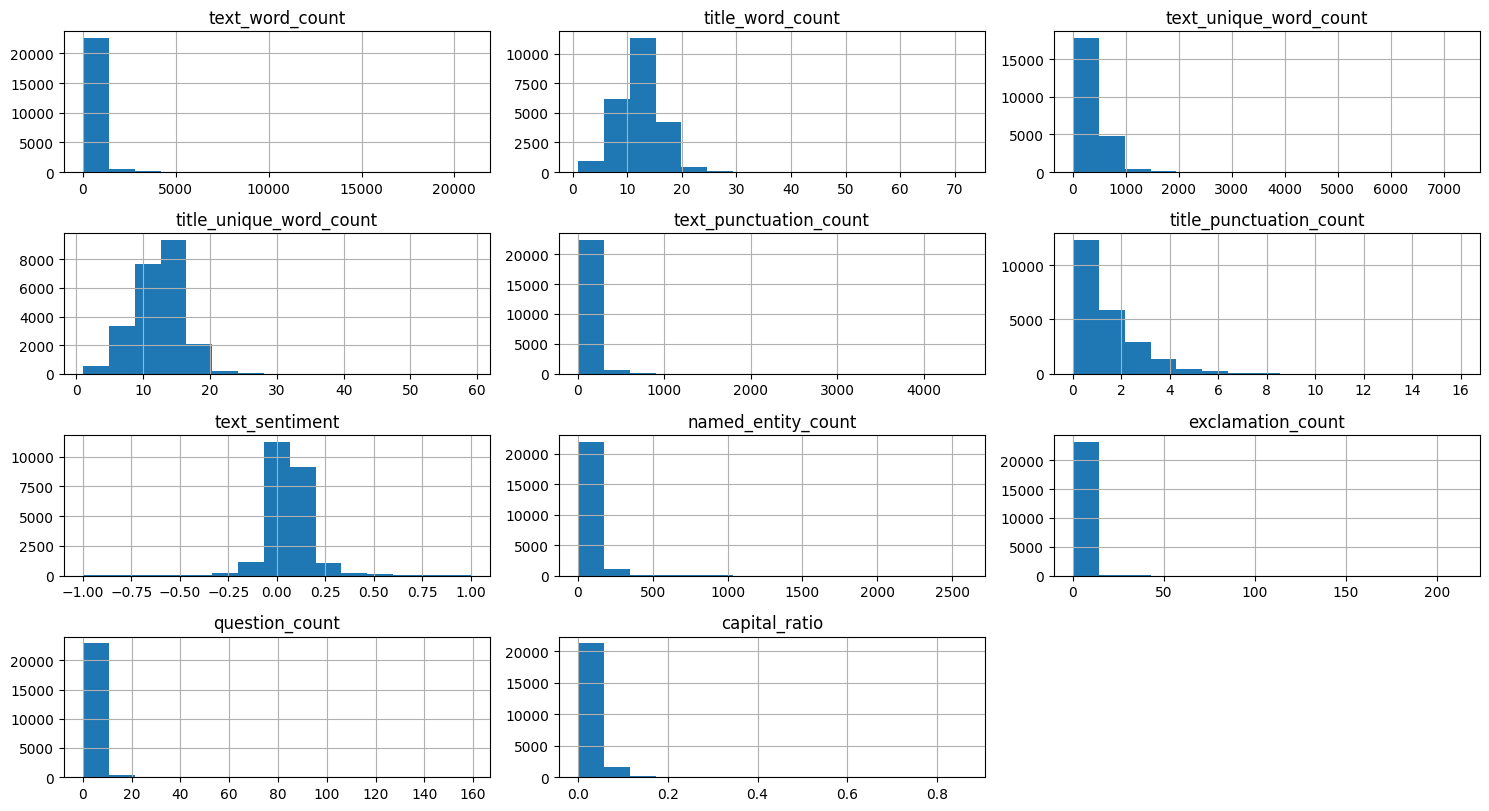

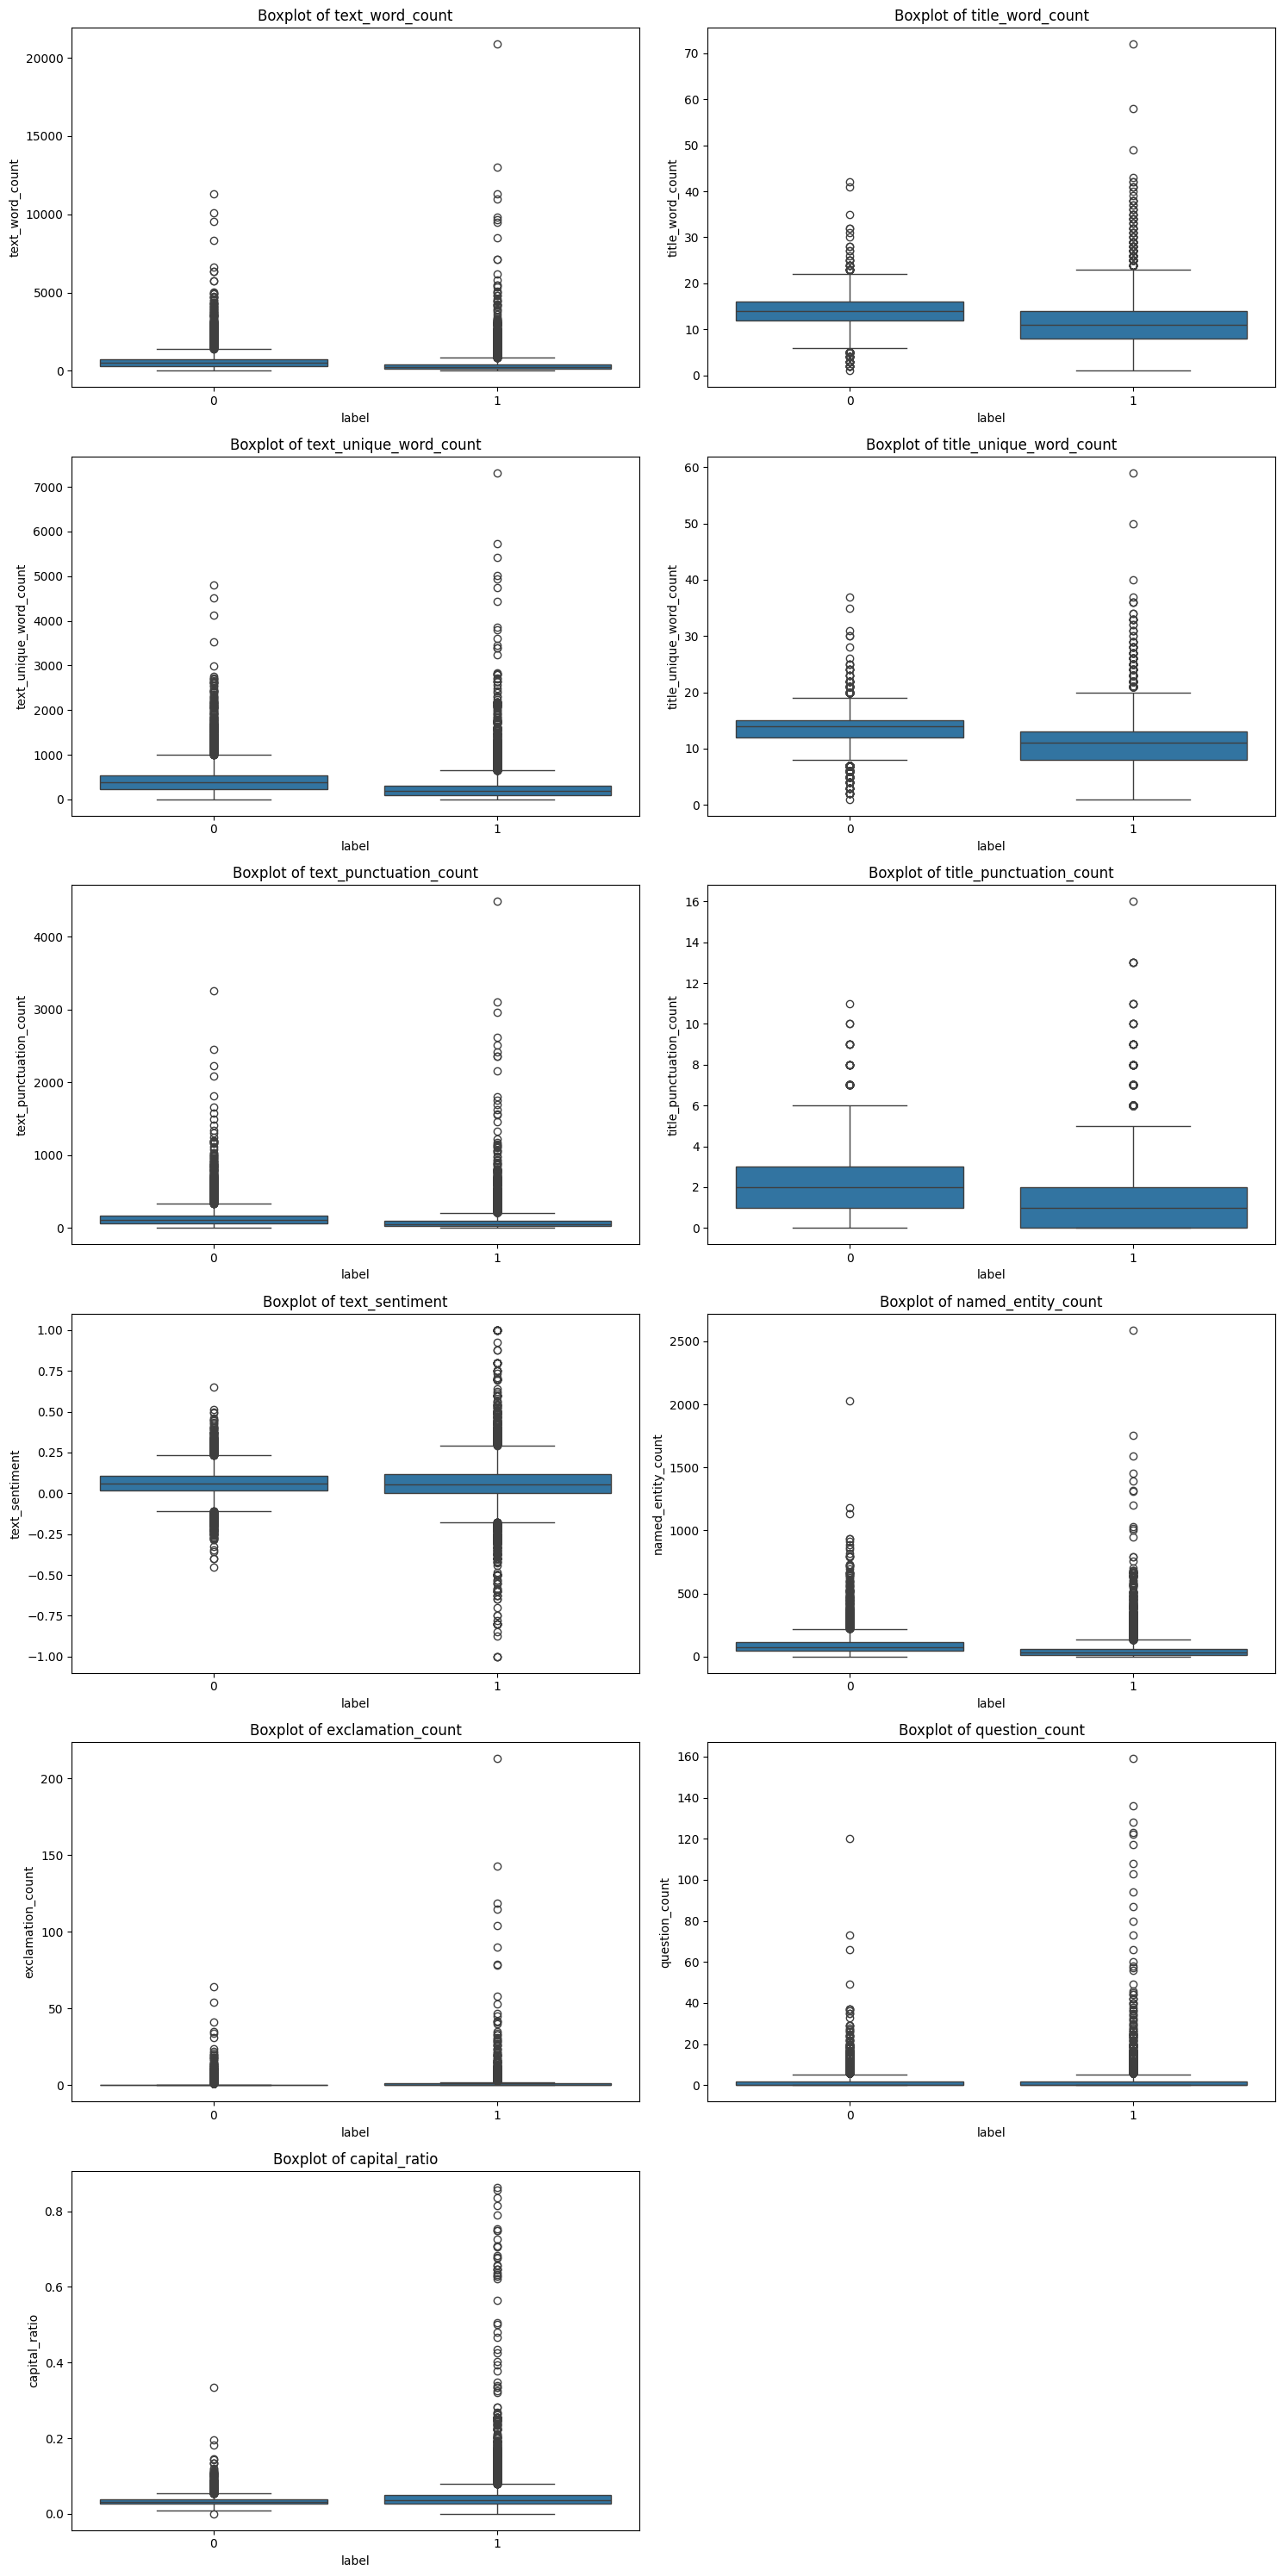

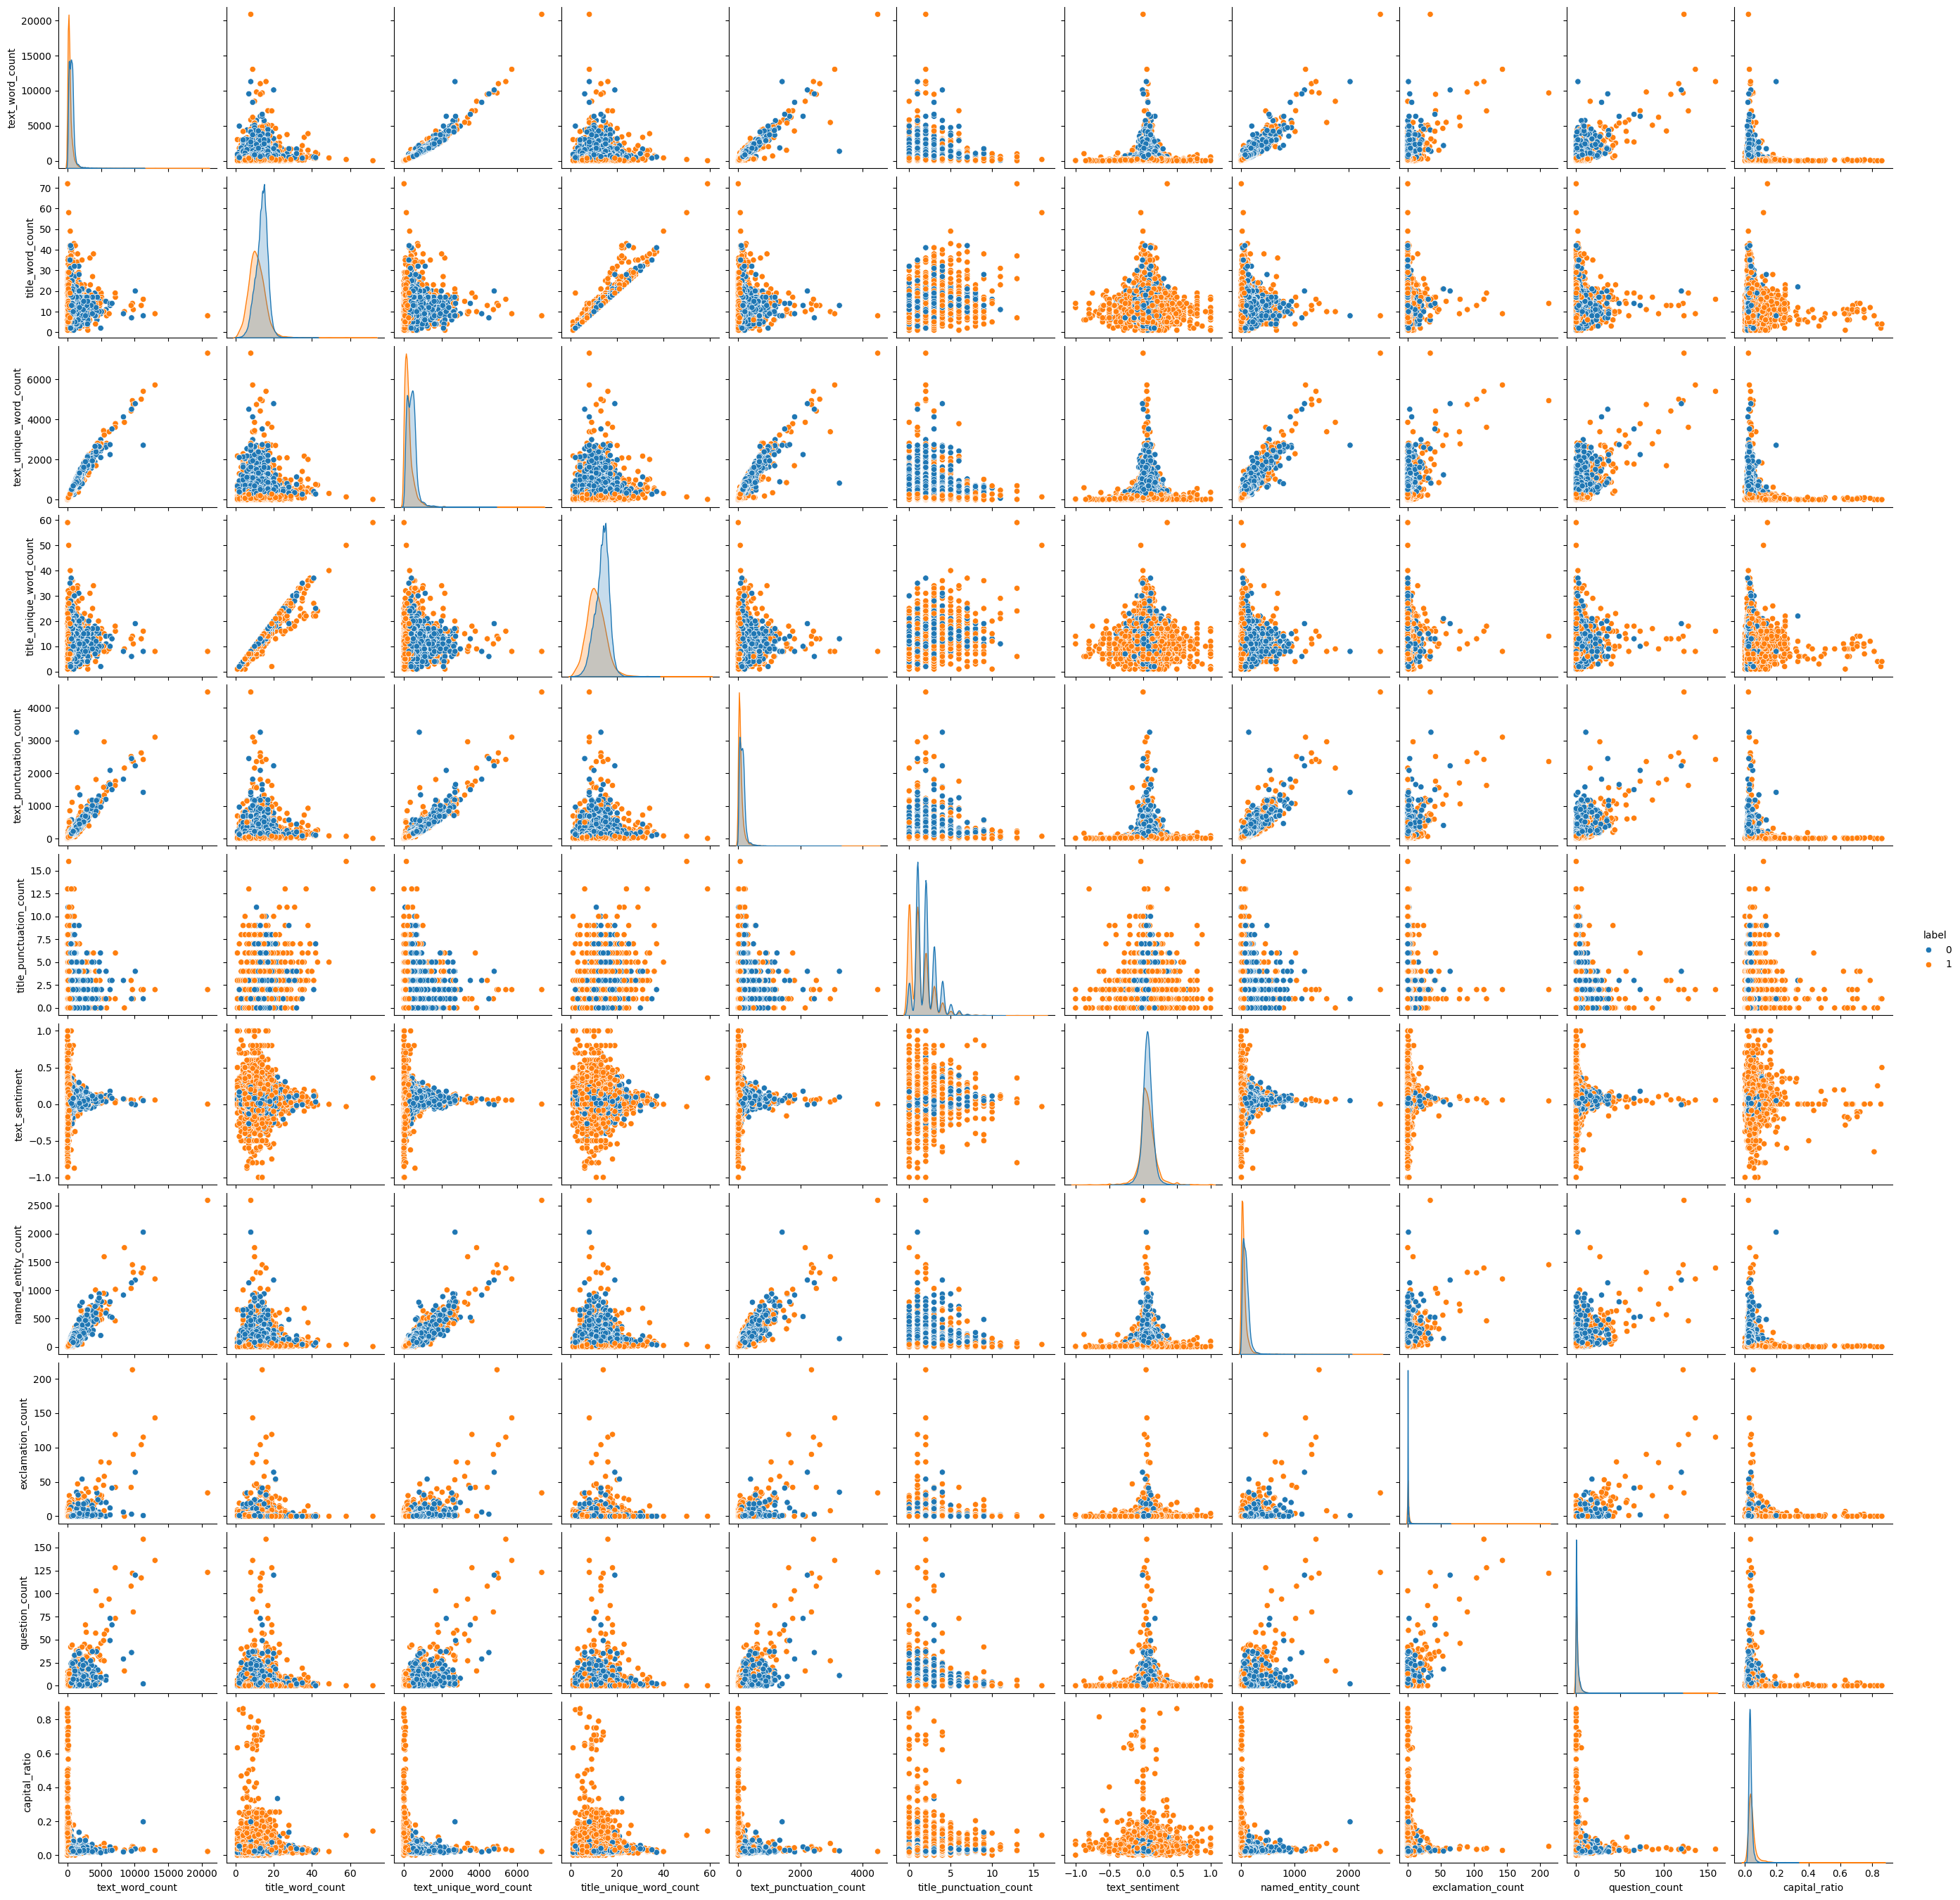

Insights:
{'column': 'text_word_count', 'mean': 471.3713109128346, 'std': 521.0079790429781, 'min': 1.0, '25%': 178.0, '50%': 361.0, '75%': 649.0, 'max': 20876.0}
{'column': 'title_word_count', 'mean': 12.473146877144819, 'std': 4.0125665389777465, 'min': 1.0, '25%': 10.0, '50%': 13.0, '75%': 15.0, 'max': 72.0}
{'column': 'text_unique_word_count', 'mean': 342.0316575154427, 'std': 306.4715651425897, 'min': 1.0, '25%': 145.0, '50%': 277.0, '75%': 476.0, 'max': 7315.0}
{'column': 'title_unique_word_count', 'mean': 12.24017673301304, 'std': 3.8117191622204123, 'min': 1.0, '25%': 10.0, '50%': 13.0, '75%': 15.0, 'max': 59.0}
{'column': 'text_punctuation_count', 'mean': 108.77934111187372, 'std': 129.08434685941452, 'min': 0.0, '25%': 37.0, '50%': 80.0, '75%': 147.0, 'max': 4482.0}
{'column': 'title_punctuation_count', 'mean': 1.6520676046671243, 'std': 1.3785607910562059, 'min': 0.0, '25%': 1.0, '50%': 1.0, '75%': 2.0, 'max': 16.0}
{'column': 'text_sentiment', 'mean': 0.06130032237750949, '

In [ ]:
# Define the numerical columns and target column
numerical_columns = [
    'text_word_count', 'title_word_count', 'text_unique_word_count',
    'title_unique_word_count', 'text_punctuation_count', 'title_punctuation_count',
    'text_sentiment', 'named_entity_count', 'exclamation_count', 'question_count',
    'capital_ratio'
]
target_column = 'label'

# Summary statistics
def summary_statistics(df, numerical_columns):
    summary = df[numerical_columns].describe()
    print("Summary Statistics:")
    print(summary)
    return summary

# Visualizations
def plot_histograms(df, numerical_columns):
    df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(5, 3))
    plt.tight_layout()
    plt.show()

def plot_boxplots(df, numerical_columns, target_column):
    n_cols = 2
    n_rows = (len(numerical_columns) + 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_columns):
        sns.boxplot(x=target_column, y=col, data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def plot_scatterplots(df, numerical_columns, target_column):
    sns.pairplot(df, hue=target_column, vars=numerical_columns)
    plt.show()

# Insights
def draw_insights(summary):
    insights = []
    for col in summary.columns:
        col_insights = {
            'column': col,
            'mean': summary[col]['mean'],
            'std': summary[col]['std'],
            'min': summary[col]['min'],
            '25%': summary[col]['25%'],
            '50%': summary[col]['50%'],
            '75%': summary[col]['75%'],
            'max': summary[col]['max']
        }
        insights.append(col_insights)
    print("Insights:")
    for insight in insights:
        print(insight)

# Running the EDA
def run_eda(df, numerical_columns, target_column):
    summary = summary_statistics(df, numerical_columns)
    plot_histograms(df, numerical_columns)
    plot_boxplots(df, numerical_columns, target_column)
    plot_scatterplots(df, numerical_columns, target_column)
    draw_insights(summary)

# Run the EDA
run_eda(combined_df, numerical_columns, target_column)

### Insights drawn from these analyses:

From the plots above we can infer few statisical views about distribution of numeric columns, corrolation between them and more statisical information:

1. **Text and Title Word Count**:
- The text_word_count and title_word_count distributions are highly skewed, with most articles having a relatively low word count but a few outliers with very high word counts.
- Box plots show a slight difference between fake and real news in terms of word count, but it may not be significant.

Insight: Normalizing or log-transforming these features could help reduce the skewness and improve model performance. Additionally, word count alone might not be a strong indicator, so combining it with other features could be beneficial.

2. **Unique Word Count:**
- Similar to the word count, both text_unique_word_count and title_unique_word_count are skewed with outliers.
- There's a slight difference in the distributions for fake and real news, which indicates that fake news might use a less diverse vocabulary.

Insight: The uniqueness of words in text and titles could be a useful feature for the model. Feature engineering techniques like creating ratios of unique to total words might provide additional insights.

3. **Punctuation and Sentiment:**
- The text_punctuation_count and title_punctuation_count show significant skewness, with some outliers.
- Sentiment (text_sentiment) distribution is relatively normal, with fake news having a slightly lower average sentiment.

Insight: Punctuation counts, especially extreme values, might be indicative of fake news. Sentiment analysis could also provide valuable insights, as fake news might have different emotional tones compared to real news.

4. **Named Entity Count and Capital Ratio:**
- named_entity_count shows a wide range of values with several outliers.
- capital_ratio is generally low for most articles but shows some higher outliers.

Insight: Named entity counts could be indicative of the credibility of the article, as real news might mention more named entities (people, organizations, etc.). High capital ratios might be indicative of sensationalism, which could be a trait of fake news.

**Recommendations:**:

- Utilize correlation analysis or feature importance techniques (e.g., using a Random Forest or Gradient Boosting model) to identify the most predictive features and reduce dimensionality.
- Experiment with different algorithms, such as ensemble methods (Random Forest, Gradient Boosting), that can handle feature interactions and outliers effectively.
- Consider capping outliers or using robust scaling methods to handle extreme values in features like word count, punctuation count, and named entity count.
- Create new features such as the ratio of unique words to total words, the ratio of named entities to total words, and combined sentiment scores.
- Normalize or log-transform skewed features like word counts and punctuation counts.